In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gld = get_pricing('GLD',fields='price',start_date='2013-1-1',end_date='2018-8-28')
gdx = get_pricing('GDX',fields='price',start_date='2013-1-1',end_date='2018-8-28')

In [4]:
gld

2013-01-02 00:00:00+00:00    163.160
2013-01-03 00:00:00+00:00    161.240
2013-01-04 00:00:00+00:00    160.450
2013-01-07 00:00:00+00:00    159.440
2013-01-08 00:00:00+00:00    160.550
2013-01-09 00:00:00+00:00    160.500
2013-01-10 00:00:00+00:00    161.990
2013-01-11 00:00:00+00:00    161.080
2013-01-14 00:00:00+00:00    161.520
2013-01-15 00:00:00+00:00    162.560
2013-01-16 00:00:00+00:00    162.630
2013-01-17 00:00:00+00:00    163.330
2013-01-18 00:00:00+00:00    163.050
2013-01-22 00:00:00+00:00    163.690
2013-01-23 00:00:00+00:00    163.220
2013-01-24 00:00:00+00:00    161.450
2013-01-25 00:00:00+00:00    160.650
2013-01-28 00:00:00+00:00    160.280
2013-01-29 00:00:00+00:00    160.970
2013-01-30 00:00:00+00:00    162.180
2013-01-31 00:00:00+00:00    161.200
2013-02-01 00:00:00+00:00    161.455
2013-02-04 00:00:00+00:00    161.980
2013-02-05 00:00:00+00:00    161.980
2013-02-06 00:00:00+00:00    162.390
2013-02-07 00:00:00+00:00    161.840
2013-02-08 00:00:00+00:00    161.550
2

In [6]:
m = np.polyfit(gld,gdx,1)
m

array([  0.45778995, -33.03928567])

In [35]:
resid = m[0]*gld - gdx + m[1]

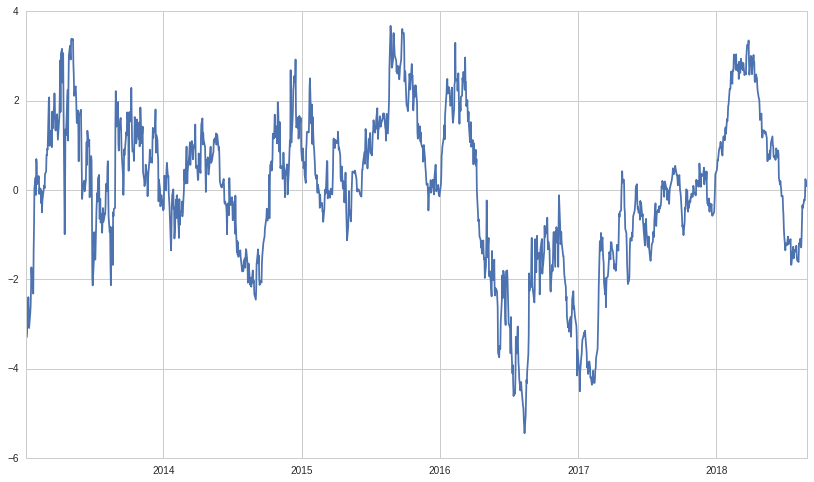

In [36]:
plt.plot(resid)

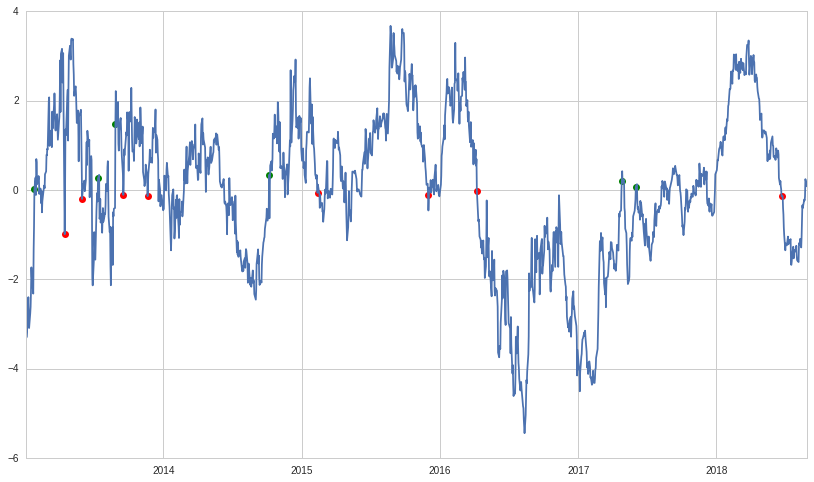

In [48]:
pnl = []
inpos = 0
thresh = 2
for d in gdx.index:
    if resid[d] > thresh and inpos==0:
        entry = resid[d]
        inpos = -1
    elif resid[d] < 0 and inpos == -1:
        pnl.append(entry - resid[d])
        inpos = 0
        plt.plot(d,resid[d],'ro')
    elif resid[d] < -thresh and inpos==0:
        entry = resid[d]
        inpos = 1
    elif resid[d] > 0 and inpos == 1:
        pnl.append(resid[d] - entry)
        inpos = 0
        plt.plot(d,resid[d],'go')
plt.plot(gdx.index,resid)

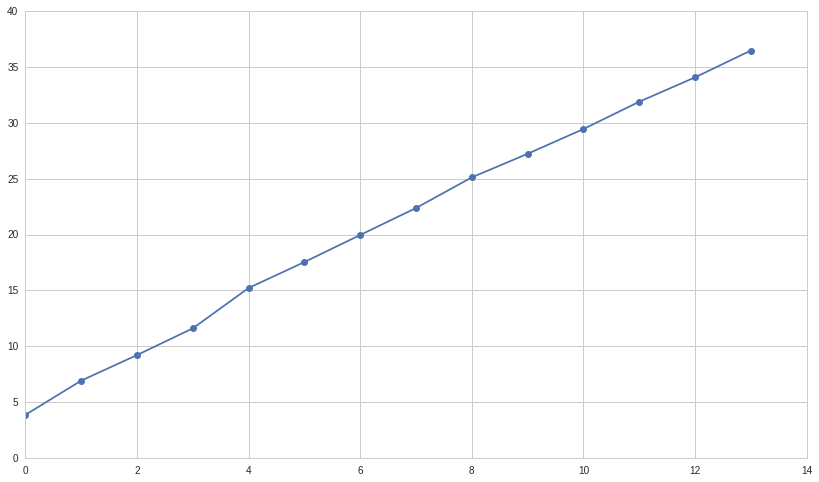

In [49]:
plt.plot(np.cumsum(pnl),'-o')